<a href="https://colab.research.google.com/github/hoofitech/fintech-practice/blob/main/do-it-pandas/12.%20%20About%20timeseries%20data/12_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12-1. datetime 객체 활용하기



In [9]:
from datetime import datetime

In [10]:
#1. now()메서드를 사용하여 현재 날짜와 시간 정보를 확인
now = datetime.now()
print(now)

2025-07-27 01:38:12.848396


In [11]:
#2. 원하는 날짜와 시간으로 datetime 객체를 생성할 수도 있다.
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
print(t1)
print(t2)

2025-07-27 01:38:12.871356
1970-01-01 00:00:00


In [12]:
#3. datetime 객체는 수학 연산자로 시간 차이를 계산할 수 있는 기능을 제공
diff = t1-t2
print(diff)

20296 days, 1:38:12.871356


In [13]:
#4. datetime 객체를 사용하여 계산한 시간의 차이는 timedelta 객체로 표현
print(type(diff))

<class 'datetime.timedelta'>


# 12-2. datetime으로 변환하기

In [14]:
#1. 에볼라 데이터셋 불러오기
import pandas as pd

ebola = pd.read_csv('country_timeseries.csv')
print(ebola.iloc[:5,:5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           NaN         8157.0                NaN
4  12/31/2014  284        2730.0         8115.0             9633.0


In [15]:
#2. Date 열의 자료형이 object인 것을 확인
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [16]:
#3. to_datetime() 함수를 사용하려 Date열의 값을 datetime형으로 변환한 것을 새로운 열에 저장
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [17]:
#4. 매개변수 format으로 데이터를 datetime 객체로 변환하는 방법을 좀 더 명확하게 지정할 수 있다.
ebola['date_dt'] = pd.to_datetime(ebola['Date'], format = '%m/%d/%Y')

In [18]:
#5. 객체가 datetime으로 변화한 것을 확인
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

* 31-03-2014와 같이 일이 가장 먼저 나오는 형식은 매개변수 dayfirst를 True로 설정
* 2014-03-31과 같이 연도가 가장 앞에 나오는 형식은 매개변수 yearfirst를 True로 설정

# 12-3. 시계열 데이터 불러오기

* read_csv() 함수는 parse_dates, inher_datetime_format, keep_date_col, date_praser, dayfirst, cache_dates처럼 시계열 데이터를 처리하는 다양한 매개변수를 제공

In [19]:
#1. 데이터의 Date 열을 매개변수 Parse_dates에 전달하여 바로 datetime으로 변환
ebola = pd.read_csv('country_timeseries.csv', parse_dates = ["Date"])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# 12-4. 시간 정보 추출하기

* datetime 객체에서 연,월,일과 같은 시간 정보 요소를 따로 추출할 수 있다.
* to_datetime()에 일시를 나타내는 문자열을 전달하면 Timestamp 객체를 반환한다

In [20]:
#1. '2021-12-14'를 to_datetime()에 전달하여 Timestamp 객체를 생성하고 연, 월, 일을 추출
d = pd.to_datetime('2021-12-14')
print(d)
print(type(d))

2021-12-14 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [21]:
print(d.year)
print(d.month)
print(d.day)

2021
12
14


In [22]:
#2. 에볼라 데이터셋의 Date 열을 datetime으로 변환하여 date_dt 열에 저장
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola[['Date', 'date_dt']])

          Date    date_dt
0   2015-01-05 2015-01-05
1   2015-01-04 2015-01-04
2   2015-01-03 2015-01-03
3   2015-01-02 2015-01-02
4   2014-12-31 2014-12-31
..         ...        ...
117 2014-03-27 2014-03-27
118 2014-03-26 2014-03-26
119 2014-03-25 2014-03-25
120 2014-03-24 2014-03-24
121 2014-03-22 2014-03-22

[122 rows x 2 columns]


In [23]:
#3. dt 속성을 사용하면 전체 열을 대상으로 datetime 객체의 메서드를 적용할 수 있다. year로 연도 추출
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']])

          Date    date_dt  year
0   2015-01-05 2015-01-05  2015
1   2015-01-04 2015-01-04  2015
2   2015-01-03 2015-01-03  2015
3   2015-01-02 2015-01-02  2015
4   2014-12-31 2014-12-31  2014
..         ...        ...   ...
117 2014-03-27 2014-03-27  2014
118 2014-03-26 2014-03-26  2014
119 2014-03-25 2014-03-25  2014
120 2014-03-24 2014-03-24  2014
121 2014-03-22 2014-03-22  2014

[122 rows x 3 columns]


In [24]:
#4. 마찬가지의 방법으로 월과 일도 추출하여 month, day 열에 저장
ebola = ebola.assign(
    month=ebola["date_dt"].dt.month,
    day=ebola["date_dt"].dt.day
)
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']])

          Date    date_dt  year  month  day
0   2015-01-05 2015-01-05  2015      1    5
1   2015-01-04 2015-01-04  2015      1    4
2   2015-01-03 2015-01-03  2015      1    3
3   2015-01-02 2015-01-02  2015      1    2
4   2014-12-31 2014-12-31  2014     12   31
..         ...        ...   ...    ...  ...
117 2014-03-27 2014-03-27  2014      3   27
118 2014-03-26 2014-03-26  2014      3   26
119 2014-03-25 2014-03-25  2014      3   25
120 2014-03-24 2014-03-24  2014      3   24
121 2014-03-22 2014-03-22  2014      3   22

[122 rows x 5 columns]


In [25]:
# 추출한 요소는 datetime형이 아닌 int32 형이다.
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

#12-5. 시간 간격 계산하기

In [26]:
#1. 데이터셋의 왼쪽 아래에 있는 5개의 행, 열 데이터 살펴보기
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [27]:
#2. date_dt 열에서 min() 메서드를 호출하여 가장 오래된 날짜를 구해본다.
print(ebola['date_dt'].min())

2014-03-22 00:00:00


In [28]:
#3. date_dt 열에서 이 값을 빼면 며칠이 지난 데이터인지 계산하여 새로운 열에 계산한 값을 넣는다.
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']]) # Day와 outbreak_d 열이 같다.

          Date  Day outbreak_d
0   2015-01-05  289   289 days
1   2015-01-04  288   288 days
2   2015-01-03  287   287 days
3   2015-01-02  286   286 days
4   2014-12-31  284   284 days
..         ...  ...        ...
117 2014-03-27    5     5 days
118 2014-03-26    4     4 days
119 2014-03-25    3     3 days
120 2014-03-24    2     2 days
121 2014-03-22    0     0 days

[122 rows x 3 columns]


In [29]:
#4. info() 로 oubreak_d 열의 자료형을 확인한 결과 timedelta형이다.
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    datetime64[ns] 
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

# 12-6. datetime 객체의 메서드 활용하기

In [30]:
#1. 파산한 은행 정보의 banklist 데이터셋을 사용
banks = pd.read_csv('banklist.csv')
print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
1  30003  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
2  58302                         Whitney Bank    28-Apr-17    26-Jul-17  
3  35495                    Cache Valley Bank     3-Mar-17    18-May-17  
4  19328                  State Bank of Texas    27-Jan-17    18-May-17  


In [31]:
#2. read_csv()의 매개변수 parse_dates에 날짜 정보가 담긴 Closing Date, Updated Date 열을 전달하면 두 열을 datetime형으로 불러올 수 있다
banks = pd.read_csv(
    'banklist.csv', parse_dates=["Closing Date", "Updated Date"]
)
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB
None


/tmp/ipython-input-31-701451505.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv(
/tmp/ipython-input-31-701451505.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv(


In [32]:
#3. 은행이 파산한 분기와 연도를 기반으로 데이터를 분석.
banks = banks.assign(
    closing_quarter=banks['Closing Date'].dt.quarter,
    closing_year = banks['Closing Date'].dt.year
)

In [33]:
#4. 파산한 연도를 나타내는 closing_year 열을 기준으로 그룹화하고 연도별 파산 은행 개수를 size()로 계산한 시리즈를 저장
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64


In [34]:
#5. 매년 각 분기에 파산한 은행이 궁금하다면 closing_year와 closing_quarter를 기준으로 데이터셋을 그룹화하고 size()로 해당하는 은행 개수를 구함
closing_year_q = (
    banks
    .groupby(['closing_year', 'closing_quarter'])
    .size()
)

print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

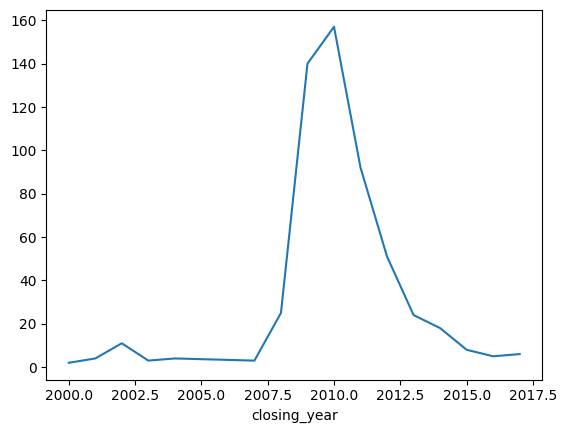

In [35]:
# 연도별 분기별 파산 은행 개수를 시각화할 수 있다.
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()

plt.savefig('closing_year.png')
plt.show()

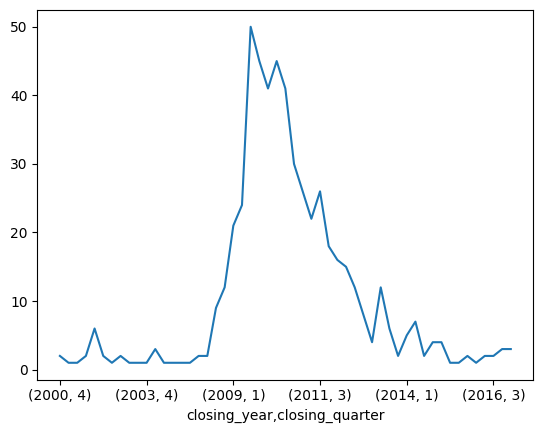

In [36]:
fig, ax = plt.subplots()
ax = closing_year_q.plot()

plt.savefig('closing_year_q.png')
plt.show()

# 12-7. 주식 데이터 다루기

In [37]:
!pip install pandas-datareader

In [38]:
# 1. 테슬라 주식 데이터 불러오기
import pandas_datareader.data as web

tesla = web.DataReader('TSLA', 'stooq')
print(tesla)

                Open      High       Low     Close     Volume
Date                                                         
2025-07-25  308.7400  323.6300  308.0100  316.0600  148227027
2025-07-24  310.0000  310.1500  300.4100  305.3000  156966023
2025-07-23  330.9000  336.2000  328.6700  332.5600   92553756
2025-07-22  329.7400  335.4098  321.5500  332.1100   77370371
2025-07-21  334.4000  338.0000  326.8800  328.4900   75768797
...              ...       ...       ...       ...        ...
2020-08-03   96.6133  100.6530   96.2933   99.0000  132140190
2020-07-31  101.0000  101.1370   94.7333   95.3833  183704400
2020-07-30   99.2000  100.8830   98.0667   99.1667  114315585
2020-07-29  100.0670  102.3200   99.1333   99.9400  141403395
2020-07-28  100.2670  104.3130   98.2933   98.4333  237130500

[1255 rows x 5 columns]


In [39]:
#2. tesla 인덱스 살펴보기
tesla.info() #DatatimeIndex이다. datetime 객체를 데이터프레임의 인데스로 설정할 때 사용하는 객체

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-07-25 to 2020-07-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [40]:
#3. tesla_stock_yahoo 파일 불러오기
tesla = pd.read_csv('tesla_stock_yahoo.csv')
print(tesla.head())

         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [41]:
#4. 날짜 형식의 Date열을 datetime형으로 다시 불러오기
tesla = pd.read_csv(
    'tesla_stock_yahoo.csv', parse_dates=["Date"]
)

In [42]:
print(tesla.info()) # Date 열이 datetime형으로 바뀜

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1791 non-null   datetime64[ns]
 1   Open       1791 non-null   float64       
 2   High       1791 non-null   float64       
 3   Low        1791 non-null   float64       
 4   Close      1791 non-null   float64       
 5   Adj Close  1791 non-null   float64       
 6   Volume     1791 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 98.1 KB
None


# 12-8. 시간별 데이터 추출하기

In [43]:
# 주식 데이터셋에서 2010년 6월 데이터만 추출하기
print(
    tesla.loc[
        (tesla.Date.dt.year == 2010) % (tesla.Date.dt.month == 6)
    ]
)

         Date  Open  High        Low      Close  Adj Close    Volume
0  2010-06-29  19.0  25.0  17.540001  23.889999  23.889999  18766300
0  2010-06-29  19.0  25.0  17.540001  23.889999  23.889999  18766300
0  2010-06-29  19.0  25.0  17.540001  23.889999  23.889999  18766300
0  2010-06-29  19.0  25.0  17.540001  23.889999  23.889999  18766300
0  2010-06-29  19.0  25.0  17.540001  23.889999  23.889999  18766300
..        ...   ...   ...        ...        ...        ...       ...
0  2010-06-29  19.0  25.0  17.540001  23.889999  23.889999  18766300
0  2010-06-29  19.0  25.0  17.540001  23.889999  23.889999  18766300
0  2010-06-29  19.0  25.0  17.540001  23.889999  23.889999  18766300
0  2010-06-29  19.0  25.0  17.540001  23.889999  23.889999  18766300
0  2010-06-29  19.0  25.0  17.540001  23.889999  23.889999  18766300

[1791 rows x 7 columns]


### DatetimeIndex 객체로 추출하기

In [44]:
#1. tesla 데이터셋의 Date열을 인덱스로 설정
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
               '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-07', '2017-08-08'],
              dtype='datetime64[ns]', name='Date', length=1791, freq=None)


In [45]:
#2. datetime 객체를 인덱스로 설정하면 원하는 날짜의 데이터를 쉽게 추출할 수 있다.
print(tesla.loc['2015'])

                 Date        Open        High         Low       Close  \
Date                                                                    
2015-01-02 2015-01-02  222.869995  223.250000  213.259995  219.309998   
2015-01-05 2015-01-05  214.550003  216.500000  207.160004  210.089996   
2015-01-06 2015-01-06  210.059998  214.199997  204.210007  211.279999   
2015-01-07 2015-01-07  213.350006  214.779999  209.779999  210.949997   
2015-01-08 2015-01-08  212.809998  213.800003  210.009995  210.619995   
...               ...         ...         ...         ...         ...   
2015-12-24 2015-12-24  230.559998  231.880005  228.279999  230.570007   
2015-12-28 2015-12-28  231.490005  231.979996  225.539993  228.949997   
2015-12-29 2015-12-29  230.059998  237.720001  229.550003  237.190002   
2015-12-30 2015-12-30  236.600006  243.630005  235.669998  238.089996   
2015-12-31 2015-12-31  238.509995  243.449997  238.369995  240.009995   

             Adj Close   Volume  
Date            

In [46]:
#3. 특정 연과 월을 기준으로 데이터를 추출할 수도 있다
print(tesla.loc['2010-06'])

                 Date       Open   High        Low      Close  Adj Close  \
Date                                                                       
2010-06-29 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999   
2010-06-30 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000   

              Volume  
Date                  
2010-06-29  18766300  
2010-06-30  17187100  


### TimedeltaIndex 객체로 추출하기

In [47]:
#1. 데이터셋의 가장 오래된 날짜와 Date 열의 값과 차이를 계산하여 ref_date라는 새로운 열을 생성
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()

In [48]:
#2. timedelta 형의 ref_date 열을 인덱스로 설정
tesla.index = tesla['ref_date']
print(tesla.index)

TimedeltaIndex([   '0 days',    '1 days',    '2 days',    '3 days',
                   '7 days',    '8 days',    '9 days',   '10 days',
                  '13 days',   '14 days',
                ...
                '2584 days', '2585 days', '2586 days', '2589 days',
                '2590 days', '2591 days', '2592 days', '2593 days',
                '2596 days', '2597 days'],
               dtype='timedelta64[ns]', name='ref_date', length=1791, freq=None)


In [49]:
#3. 인덱스가 TimedeltaIndex 객체로 설정되었고 전체 데이터를 살펴보기
print(tesla)

                Date        Open        High         Low       Close  \
ref_date                                                               
0 days    2010-06-29   19.000000   25.000000   17.540001   23.889999   
1 days    2010-06-30   25.790001   30.420000   23.299999   23.830000   
2 days    2010-07-01   25.000000   25.920000   20.270000   21.959999   
3 days    2010-07-02   23.000000   23.100000   18.709999   19.200001   
7 days    2010-07-06   20.000000   20.000000   15.830000   16.110001   
...              ...         ...         ...         ...         ...   
2591 days 2017-08-02  318.940002  327.119995  311.220001  325.890015   
2592 days 2017-08-03  345.329987  350.000000  343.149994  347.089996   
2593 days 2017-08-04  347.000000  357.269989  343.299988  356.910004   
2596 days 2017-08-07  357.350006  359.480011  352.750000  355.170013   
2597 days 2017-08-08  357.529999  368.579987  357.399994  365.220001   

            Adj Close    Volume  ref_date  
ref_date           

In [50]:
#4. 시간 간격이 0일부터 10일까지인 데이터를 추출
print(tesla.loc['0 day': '10 day'])

               Date       Open       High        Low      Close  Adj Close  \
ref_date                                                                     
0 days   2010-06-29  19.000000  25.000000  17.540001  23.889999  23.889999   
1 days   2010-06-30  25.790001  30.420000  23.299999  23.830000  23.830000   
2 days   2010-07-01  25.000000  25.920000  20.270000  21.959999  21.959999   
3 days   2010-07-02  23.000000  23.100000  18.709999  19.200001  19.200001   
7 days   2010-07-06  20.000000  20.000000  15.830000  16.110001  16.110001   
8 days   2010-07-07  16.400000  16.629999  14.980000  15.800000  15.800000   
9 days   2010-07-08  16.139999  17.520000  15.570000  17.459999  17.459999   
10 days  2010-07-09  17.580000  17.900000  16.549999  17.400000  17.400000   

            Volume ref_date  
ref_date                     
0 days    18766300   0 days  
1 days    17187100   1 days  
2 days     8218800   2 days  
3 days     5139800   3 days  
7 days     6866900   7 days  
8 days   

# 12-9. 시간 범위 다루기

In [51]:
# 특정일이 빠진 데이터를 보려면 어떻게 해야할까
#1. 에볼라 데이터셋을 불러와서 처음 5개 행을 확인
ebola = pd.read_csv(
    'country_timeseries.csv', parse_dates = ["Date"]
)
print(ebola.iloc[:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0   2015-01-05  289        2776.0            NaN            10030.0
1   2015-01-04  288        2775.0            NaN             9780.0
2   2015-01-03  287        2769.0         8166.0             9722.0
3   2015-01-02  286           NaN         8157.0                NaN
4   2014-12-31  284        2730.0         8115.0             9633.0
..         ...  ...           ...            ...                ...
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN

[122 rows x 5 columns]


In [52]:
#2. 출력 결과를 보면 날짜가 2015-01-01인 데이터가 없다. date_range() 함수를 사용하려 시작 날짜와 끝 날짜를 지정하면 해당 범위의 모든 날짜를 포함한 DatetimeIndex를 생성할 수 있다.
head_range = pd.date_range(start='2014-12-31', end = '2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [53]:
#3. 생성한 날짜 범위에 맞게 에볼라 데이터셋의 처음 5개 행을 추출
ebola_5 = ebola.head()
#4. Date 열을 인덱스로 설정해야 한다
ebola_5.index = ebola_5['Date']
#5. reindex()에 head_range를 전달하여 새로 생성한 DatetimeIndex로 인덱스를 다시 설정
ebola_5 = ebola_5.reindex(head_range)
print(ebola_5.iloc[:,:5]) #날짜 2015-01-01 이외 모든 데이터를 NaN으로 설정

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
2014-12-31 2014-12-31  284.0        2730.0         8115.0             9633.0
2015-01-01        NaT    NaN           NaN            NaN                NaN
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0


## 시간 범위의 주기 설정하기

* freq 라는 매개변수에 여러 변수로 시간 주기를 지정할 수 있다

In [54]:
#1. 평일 주기로 시간 범위의 날짜를 생성하고 싶다면 freq에 'B'를 전달하면 된다
print(pd.date_range('2022-01-01', '2022-01-07', freq='B'))

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07'],
              dtype='datetime64[ns]', freq='B')


### 시간 범위의 주기 간격 설정하기

In [55]:
#1. freq에 'B'대신 '2B'를 전달하여 두 배 주기를 설정할 수 있음
print((pd.date_range('2022-01-01', '2022-01-07', freq='2B')))

DatetimeIndex(['2022-01-03', '2022-01-05', '2022-01-07'], dtype='datetime64[ns]', freq='2B')


In [56]:
#2. 다양한 주기와 조합하여 주기 간격을 설정할 수도 있다.
print(pd.date_range('2022-01-01', '2022-12-31', freq = 'WOM-1THU')) #매월 첫번째 목요일 구하기
print(pd.date_range('2022-01-01', '2022-12-31', freq='WOM-3FRI')) #매월 세번째 금요일

DatetimeIndex(['2022-01-06', '2022-02-03', '2022-03-03', '2022-04-07',
               '2022-05-05', '2022-06-02', '2022-07-07', '2022-08-04',
               '2022-09-01', '2022-10-06', '2022-11-03', '2022-12-01'],
              dtype='datetime64[ns]', freq='WOM-1THU')
DatetimeIndex(['2022-01-21', '2022-02-18', '2022-03-18', '2022-04-15',
               '2022-05-20', '2022-06-17', '2022-07-15', '2022-08-19',
               '2022-09-16', '2022-10-21', '2022-11-18', '2022-12-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')


# 12-10. 열 방향으로 값 옮기기


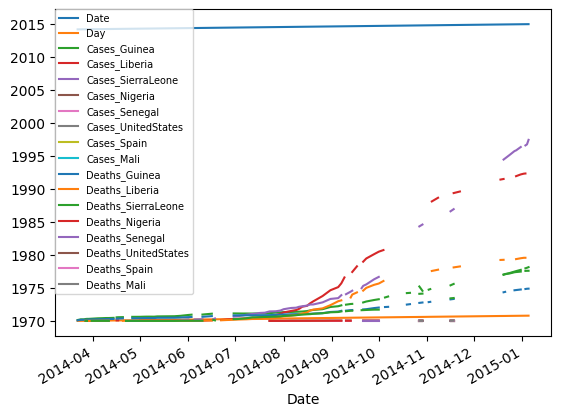

<Figure size 640x480 with 0 Axes>

In [58]:
# 에볼라 데이터셋의 Date열을 기준으로 나라별 확산 경향을 그래프로 그리기
import matplotlib.pyplot as plt

ebola.index = ebola["Date"]

fig, ax = plt.subplots()
ax = ebola.plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.0)
plt.show()
plt.savefig('ebola.png')
# 나라별로 발병일이 달라 그래프가 그려지기 시작한 날짜가 모두 다르다

In [59]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


* 각 나라의 발병일을 가장 먼저 에볼라가 발병한 Guinea와 같은 위치로 옮겨야 나라별 확산속도를 제대로 비교할 수 있다
* 날짜가 결측값일수도 있으므로 시간 범위를 날짜별로 생성하여 인덱스를 다시 설정합니다.
* 데이터셋의 가장 오래된 날짜와 각 열의 가장 오래된 유효 되이테의 날짜 차이를 계산
* 계산된 차이만큼 각 열을 옮긴다.

In [60]:
# Date 열을 parse_dates에 전달하여 datetime 객체로 변환하고 이 열을 인덱스로 설정.
ebola = pd.read_csv(
    'country_timeseries.csv',
    parse_dates = ["Date"],
    index_col = "Date"
)
print(ebola.iloc[:,:4])

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                           
2015-01-05  289        2776.0            NaN            10030.0
2015-01-04  288        2775.0            NaN             9780.0
2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02  286           NaN         8157.0                NaN
2014-12-31  284        2730.0         8115.0             9633.0
...         ...           ...            ...                ...
2014-03-27    5         103.0            8.0                6.0
2014-03-26    4          86.0            NaN                NaN
2014-03-25    3          86.0            NaN                NaN
2014-03-24    2          86.0            NaN                NaN
2014-03-22    0          49.0            NaN                NaN

[122 rows x 4 columns]


In [68]:
# 데이터에 없는 날짜를 모두 채울 수 있도록 시간 범위를 생성.
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [69]:
# 데이터가 오래된 날짜부터 오름차순으로 되어있기 때문에 뒤집어주기
new_idx = reversed(new_idx)
print(new_idx)

In [70]:
# 데이터의 인덱스를 다시 설정
ebola = ebola.reindex(new_idx)

In [71]:
# 결과 데이터를 보면 기존에 없던 날짜는 NaN 행으로 데이터에 추가된 것을 확인
print(ebola.iloc[:,:4])

              Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01    NaN           NaN            NaN                NaN
...           ...           ...            ...                ...
2014-03-26    4.0          86.0            NaN                NaN
2014-03-25    3.0          86.0            NaN                NaN
2014-03-24    2.0          86.0            NaN                NaN
2014-03-23    NaN           NaN            NaN                NaN
2014-03-22    0.0          49.0            NaN                NaN

[290 rows x 4 columns]


In [72]:
# last_valid_index() 메서드를 이용하여 결측값이 아니거나 null이 아닌 마지막 값의 인덱스 이름을 반환할 수 있다.
# 반대로 결측 값이 아니거나 null이 아닌 첫 번째 값을 반환하는 first_valid_index() 메서드도 있다.
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [73]:
# 데이터셋에서 가장 오래된 날짜를 확인
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [74]:
# 각 열의 가장 오래된 유효 날짜인 last_valid에서 이 날짜를 뺀다.
shift_values = last_valid - earliest_date
print(shift_values)

Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [75]:
# shift() 메서드를 사용하여 각 열을 순회하면서 shift_values 값 만큼 열을 아래로 옮긴다. 옮긴 데이터는 딕셔너리 ebola_dict에 열 이름을 key로 하여 저장
ebola_dict ={}

for idx,col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

print(ebola_dict)

{'Day': 2015-01-05    289.0
2015-01-04    288.0
2015-01-03    287.0
2015-01-02    286.0
2015-01-01      NaN
              ...  
2014-03-26      4.0
2014-03-25      3.0
2014-03-24      2.0
2014-03-23      NaN
2014-03-22      0.0
Name: Day, Length: 290, dtype: float64, 'Cases_Guinea': 2015-01-05    2776.0
2015-01-04    2775.0
2015-01-03    2769.0
2015-01-02       NaN
2015-01-01       NaN
               ...  
2014-03-26      86.0
2014-03-25      86.0
2014-03-24      86.0
2014-03-23       NaN
2014-03-22      49.0
Name: Cases_Guinea, Length: 290, dtype: float64, 'Cases_Liberia': 2015-01-05    NaN
2015-01-04    NaN
2015-01-03    NaN
2015-01-02    NaN
2015-01-01    NaN
             ... 
2014-03-26    8.0
2014-03-25    NaN
2014-03-24    7.0
2014-03-23    3.0
2014-03-22    8.0
Name: Cases_Liberia, Length: 290, dtype: float64, 'Cases_SierraLeone': 2015-01-05    NaN
2015-01-04    NaN
2015-01-03    NaN
2015-01-02    NaN
2015-01-01    NaN
             ... 
2014-03-26    2.0
2014-03-25    NaN
2014-0

/tmp/ipython-input-75-4067322948.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = shift_values[idx].days


In [76]:
ebola_shift = pd.DataFrame(ebola_dict)
print(ebola_shift.tail())

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23  NaN           NaN            3.0                2.0   
2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN          NaN   
2014-03-22            0.0            1.0                 1.0          1.0   

            Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
2014-03-26         NaN           62.0             4.0    

In [77]:
# 인덱스였던 날짜는 더는 의미가 없습니다. 인덱스를 제거하고 발병일 기준으로 며칠이 지났는지 인덱스로 다시 설정해야함
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Day'], axis="columns") # drop()메서드로 Day열 삭제
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

# 12-11. 시간 주기 변경하기

datetime의 시간 주기를 변경하는 것을 리샘플링이라고 한다.
* 다운샘플링 : 작은 주기에서 큰 주기로 변경하기(일 기준에서 월 기준으로)
* 업샘플링 : 큰 주기에서 작은 주기로 변경하기(월 기준에서 일 기준으로)
* 변경 없음 : 주기의 크기는 변경하지 않고 세부 설정만 변경하기(매월 첫 번째 목요일에서 매월 마지막 주 금요일로)

In [78]:
# resample() 메서드에 원하는 시간 주기를 전달하여 인덱스의 시간 주기를 변경할 수 있다.
# 일 기준으로 주기가 설정된 ebola데이터프레임의 인덱스를 월 기준으로 변경
down= ebola.resample('M').mean() # 일 기준으로 작성된 데이터를 월 단위로 취합하기 위해 mean()으로 평균값을 사용
print(down.iloc[:,:5])

                   Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
2014-03-31    4.500000     94.500000       6.500000           3.333333   
2014-04-30   24.333333    177.818182      24.555556           2.200000   
2014-05-31   51.888889    248.777778      12.555556           7.333333   
2014-06-30   84.636364    373.428571      35.500000         125.571429   
2014-07-31  115.700000    423.000000     212.300000         420.500000   
2014-08-31  145.090909    559.818182     868.818182         844.000000   
2014-09-30  177.500000    967.888889    2815.625000        1726.000000   
2014-10-31  207.470588   1500.444444    4758.750000        3668.111111   
2014-11-30  237.214286   1950.500000    7039.000000        5843.625000   
2014-12-31  271.181818   2579.625000    7902.571429        8985.875000   
2015-01-31  287.500000   2773.333333    8161.500000        9844.000000   

            Cases_Nigeria  
2014-03-31            NaN  
2014-04-30            NaN  
2014-05-31            NaN  

/tmp/ipython-input-78-2545003569.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  down= ebola.resample('M').mean() # 일 기준으로 작성된 데이터를 월 단위로 취합하기 위해 mean()으로 평균값을 사용


In [79]:
# 다시 일 기준으로 변경. 월별로 작성된 데이터를 일별로 나눌 방법은 없으므로 월별 마지막 날을 제외한 나머지 일자는 모두 NaN으로 채우기
up = down.resample('D').mean()
print(up.iloc[:,:5])

              Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
2014-03-31    4.5     94.500000            6.5           3.333333   
2014-04-01    NaN           NaN            NaN                NaN   
2014-04-02    NaN           NaN            NaN                NaN   
2014-04-03    NaN           NaN            NaN                NaN   
2014-04-04    NaN           NaN            NaN                NaN   
...           ...           ...            ...                ...   
2015-01-27    NaN           NaN            NaN                NaN   
2015-01-28    NaN           NaN            NaN                NaN   
2015-01-29    NaN           NaN            NaN                NaN   
2015-01-30    NaN           NaN            NaN                NaN   
2015-01-31  287.5   2773.333333         8161.5        9844.000000   

            Cases_Nigeria  
2014-03-31            NaN  
2014-04-01            NaN  
2014-04-02            NaN  
2014-04-03            NaN  
2014-04-04            NaN  
...

# 12-12. 시간대 다루기

In [80]:
# 시간처리에 특화된 pytz 라이브러리
import pytz

# 596가지 지역별 시간대가 존재한다
print(len(pytz.all_timezones))

597


In [81]:
# 미국 시간대를 살펴보기
import re
regex = re.compile(r'^US')
selected_files = filter(regex.search, pytz.common_timezones)
print(list(selected_files))

['US/Alaska', 'US/Arizona', 'US/Central', 'US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific']


In [82]:
# 뉴욕에서 오전 07:00에 출발하여 LA에 오전 9:57에 도착하는 비행편 표현하기
# 뉴욕이 속한 시간대를 나타내는 'US/Eastern'을 매개변수 tx로 전달하여 오전 7:00 타임스탬프를 생성
depart = pd.Timestamp('2017-08-29 07:00', tz = 'US/Eastern')
print(depart)

2017-08-29 07:00:00-04:00


In [83]:
# -04:00는 판다스이 Timestamp가 협정 세계시를 기준으로 설정하여 tz로 지정한 시간대와 UTC의 차이를 타임스탬프와 함께 기록
# tz없이 도착시간을 생성하면?
arrive = pd.Timestamp('2017-08-29 09:57')
print(arrive)

2017-08-29 09:57:00


In [84]:
# 지역을 반영하여 시간대를 조절.  Timestamp 객체에 tz_localize() 메서드를 사용하려 시간대를 설정
arrive = arrive.tz_localize('US/Pacific')
print(arrive)

2017-08-29 09:57:00-07:00


In [85]:
# 비행기가 로스앤젤레스에 도착했을 때 뉴욕시간 확인
print(arrive.tz_convert('US/Eastern'))

2017-08-29 12:57:00-04:00


In [86]:
# 두 시간대의 차이를 계산
duration= arrive-depart
print(duration)

0 days 05:57:00
